In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Dataset/Gold.csv")

In [3]:
df.head()

,Date,Open,Close,High,Low
0,2018-01-01,1300.760,1313.075,1316.08375,1300.6425
1,2018-01-02,1302.910,1316.500,1318.91000,1302.8550
2,2018-01-03,1318.375,1318.875,1321.30000,1307.7100
3,2018-01-04,1313.105,1327.875,1327.87500,1306.0500
4,2018-01-05,1322.050,1319.590,1323.50500,1313.9100


In [4]:
df = df[["Close"]]
df.reset_index(drop=True)
df.isnull().sum()

Close    0
dtype: int64

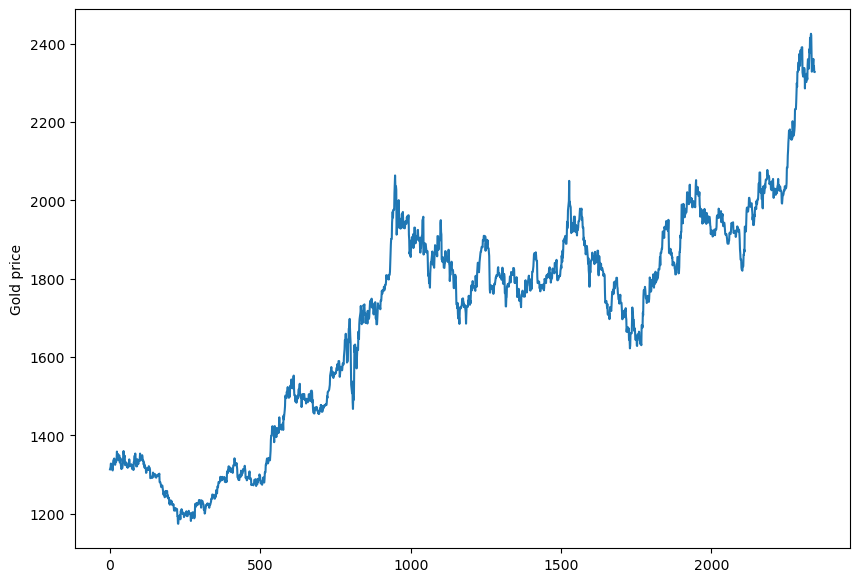

In [5]:
df.Close.plot(figsize = (10, 7))
plt.ylabel("Gold price")
plt.show()


In [6]:
t = .8
t = int(t * len(df))

data_train = df[:t]
data_test = df[t:]

In [7]:
# Chia các tập x,y train, test tương ứng
X_train = np.array(data_train.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(data_train['Close']) #Lấy dữ liệu giá Close

X_test = np.array(data_test.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(data_test['Close']) #Lấy dữ liệu giá Close

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#Tạo mô hình hồi quy tuyến tính y = m*X1 + c
linear = LinearRegression().fit(X_train, y_train)
print("m1: " , linear.coef_[0])
print("c: " , linear.intercept_)

m1:  0.3867583301938242
c:  1252.32720594172


In [10]:
predicted_price = linear.predict(X_test)
predicted = pd.DataFrame(predicted_price, columns = ['Close'])
predicted

,Close
0,1977.499075
1,1977.885833
2,1978.272592
3,1978.659350
4,1979.046108
...,...
464,2156.954940
465,2157.341699
466,2157.728457
467,2158.115215


In [11]:
mape = np.mean(np.abs(predicted_price - y_test)/np.abs(y_test)) *100
mse = np.mean(np.square(y_test - predicted_price))
rmse = np.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 4.854867570988062
Mean Squared Error (MSE): 13670.76969322513
Root Mean Squared Error (RMSE): 116.92206675057163


In [12]:
dt_train = np.append(data_train, predicted['Close'][0]) 

In [13]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = linear.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[2158.88873192 2159.27549025 2159.66224858 2160.04900691 2160.43576524
 2160.82252357 2161.2092819  2161.59604023 2161.98279856 2162.36955689
 2162.75631522 2163.14307355 2163.52983188 2163.91659021 2164.30334854
 2164.69010687 2165.0768652  2165.46362353 2165.85038186 2166.23714019
 2166.62389852 2167.01065685 2167.39741518 2167.78417351 2168.17093184
 2168.55769017 2168.9444485  2169.33120683 2169.71796516 2170.10472349
 2170.49148182 2170.87824015 2171.26499848 2171.65175681 2172.03851514
 2172.42527347 2172.8120318  2173.19879013 2173.58554846 2173.97230679
 2174.35906512 2174.74582345 2175.13258178 2175.51934011 2175.90609844
 2176.29285677 2176.6796151  2177.06637344 2177.45313177 2177.8398901
 2178.22664843 2178.61340676 2179.00016509 2179.38692342 2179.77368175
 2180.16044008 2180.54719841 2180.93395674 2181.32071507 2181.7074734
 2182.09423173 2182.48099006 2182.86774839 2183.25450672 2183.64126505
 2184.02802338 2184.41478171 218

In [14]:
plt.rcParams['figure.figsize'] = [18, 10]

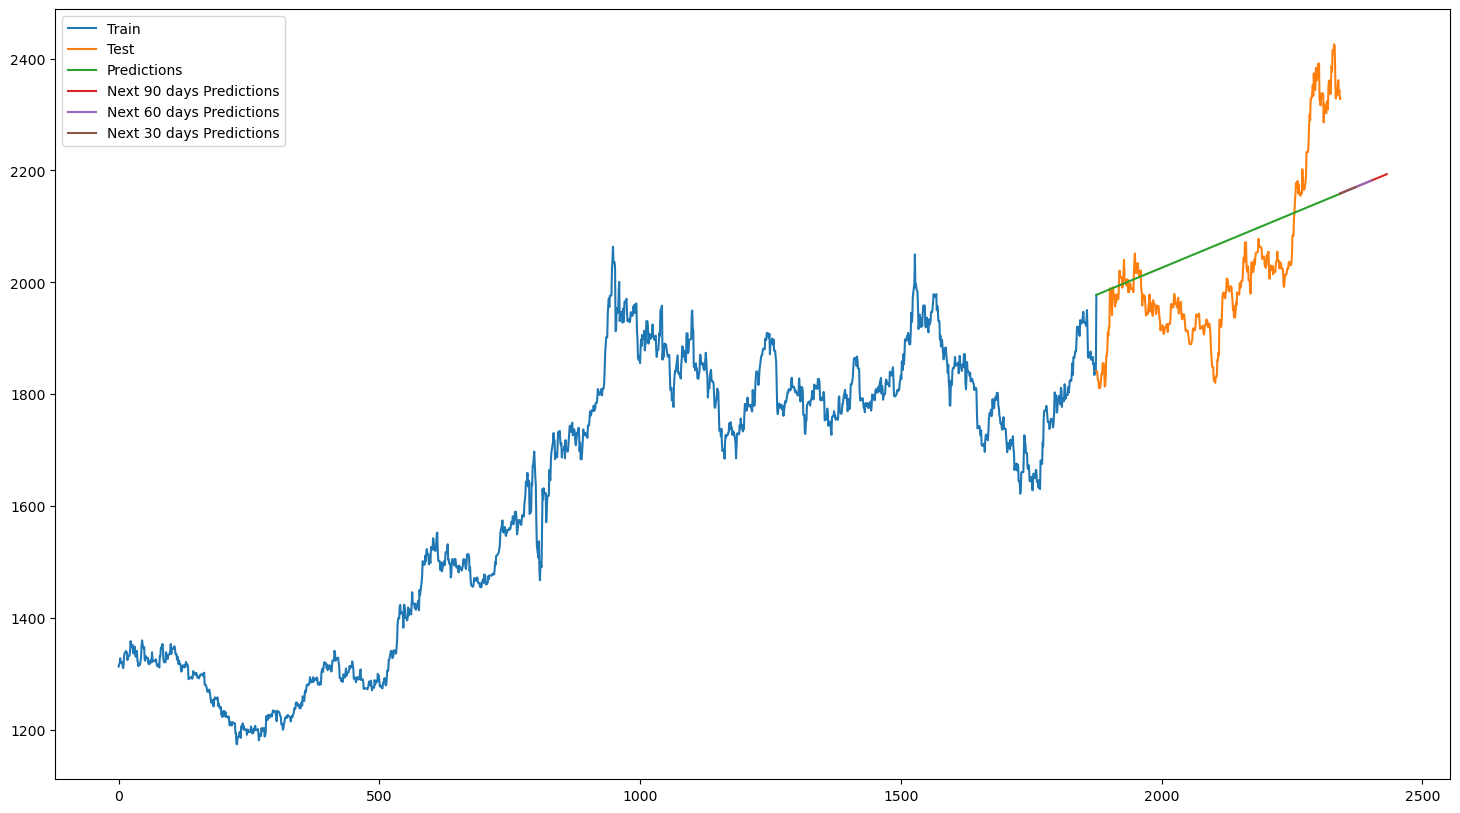

In [15]:
plt.plot(pd.RangeIndex(start=0, stop=len(dt_train), step=1), dt_train)
plt.plot(data_test.index, data_test['Close'])
plt.plot(data_test.index, predicted['Close'])
plt.plot(last_data,y_next_90_days)
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+60, step=1),y_next_90_days[0:60])
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+30, step=1),y_next_90_days[0:30])
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])

plt.show()